### Problem statement : What factors influence Airbnb listing prices in New York City, and how can we visualize these trends to help hosts optimize their pricing strategy?

#### Step 1: Setup and Load Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Step 2 : Data Cleaning

In [4]:
# Check for missing values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# Fill missing 'reviews_per_month' with 0 (no reviews yet)
df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-5-ec164532c26c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [6]:
# Drop rows with missing 'name' or 'host_name' (minimal impact)
df.dropna(subset=['name', 'host_name'], inplace=True)

In [7]:
# Remove outliers in 'price' (e.g., price > $1000 or price <= 0)
df = df[(df['price'] > 0) & (df['price'] <= 1000)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48608 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48608 non-null  int64  
 1   name                            48608 non-null  object 
 2   host_id                         48608 non-null  int64  
 3   host_name                       48608 non-null  object 
 4   neighbourhood_group             48608 non-null  object 
 5   neighbourhood                   48608 non-null  object 
 6   latitude                        48608 non-null  float64
 7   longitude                       48608 non-null  float64
 8   room_type                       48608 non-null  object 
 9   price                           48608 non-null  int64  
 10  minimum_nights                  48608 non-null  int64  
 11  number_of_reviews               48608 non-null  int64  
 12  last_review                     38704

#### Step 3 : Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics of numerical columns
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.860800e+04  4.860800e+04  48608.000000  48608.000000  48608.000000   
mean   1.902293e+07  6.762614e+07     40.728930    -73.952052    141.322828   
std    1.097969e+07  7.861338e+07      0.054568      0.046169    116.750984   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.476693e+06  7.825378e+06     40.690017    -73.982980     69.000000   
50%    1.967766e+07  3.080866e+07     40.722970    -73.955600    105.000000   
75%    2.914990e+07  1.074344e+08     40.763130    -73.936130    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990   1000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48608.000000       48608.000000       48608.000000   
mean         6.955810          23.353522           1.094780   
std         19.767603          44.630568           1.599397   
min          1.000000           0.00

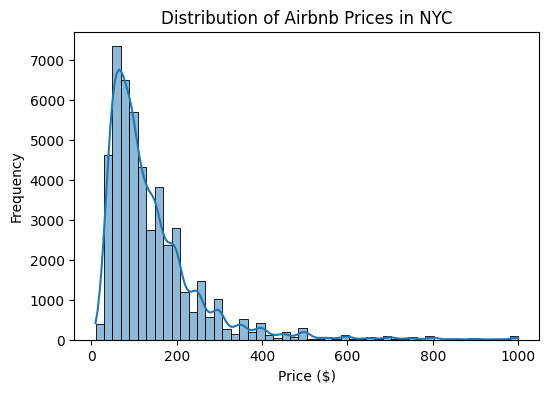

In [15]:
# Distribution of prices
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Average price by neighbourhood group (borough)
avg_price_by_borough = df.groupby('neighbourhood_group')['price'].mean().sort_values()
print("\nAverage price by borough:")
print(avg_price_by_borough)


Average price by borough:
neighbourhood_group
Bronx             85.330267
Queens            95.025115
Staten Island     98.584906
Brooklyn         117.883352
Manhattan        178.951421
Name: price, dtype: float64


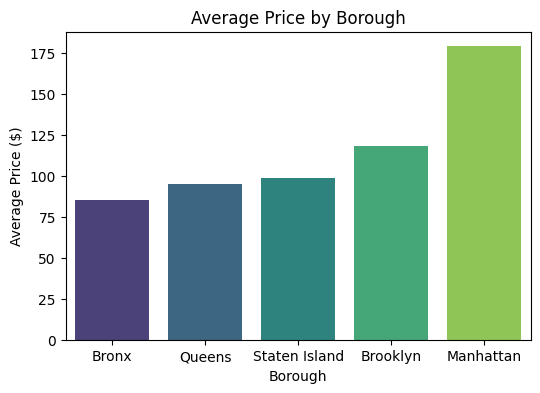

In [19]:
# Visualize average price by borough
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_by_borough.index, y=avg_price_by_borough.values, hue=avg_price_by_borough.index, palette='viridis', legend=False)
plt.title('Average Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price ($)')
plt.show()

#### Step 4: Analyze Room Type and Price

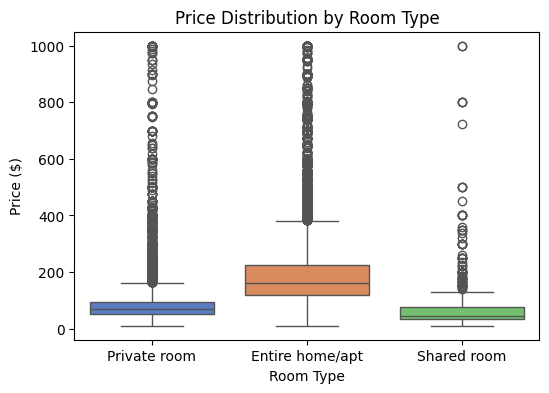

In [22]:
# Boxplot of price by room type
plt.figure(figsize=(6, 4))
sns.boxplot(x='room_type', y='price', data=df, hue='room_type', palette='muted', legend=False)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

In [23]:
# Average price by room type and borough
price_by_room_borough = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
print("\nAverage price by room type and borough:")
print(price_by_room_borough)


Average price by room type and borough:
room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.645503     63.147692    58.610169
Brooklyn                  168.549716     72.891991    50.773723
Manhattan                 224.726694    109.242764    88.977083
Queens                    141.994258     68.256532    54.163265
Staten Island             139.925287     62.292553    57.444444


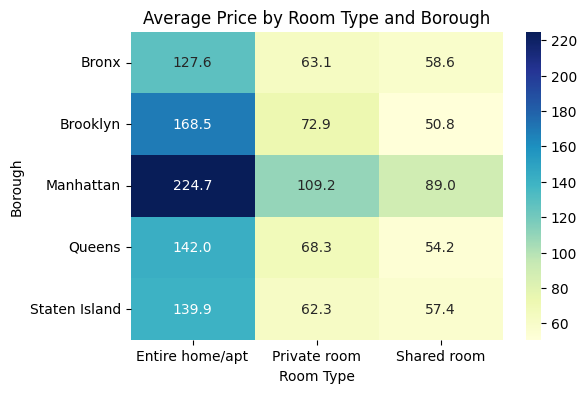

In [24]:
# Heatmap of average prices
plt.figure(figsize=(6, 4))
sns.heatmap(price_by_room_borough, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Price by Room Type and Borough')
plt.xlabel('Room Type')
plt.ylabel('Borough')
plt.show()

#### Step 5: Correlation and Scatter Plot

In [25]:
# Correlation between numerical features
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                      price  minimum_nights  number_of_reviews  \
price              1.000000        0.017676          -0.057812   
minimum_nights     0.017676        1.000000          -0.081587   
number_of_reviews -0.057812       -0.081587           1.000000   
reviews_per_month -0.055861       -0.127573           0.588769   
availability_365   0.117899        0.145677           0.173333   

                   reviews_per_month  availability_365  
price                      -0.055861          0.117899  
minimum_nights             -0.127573          0.145677  
number_of_reviews           0.588769          0.173333  
reviews_per_month           1.000000          0.165465  
availability_365            0.165465          1.000000  


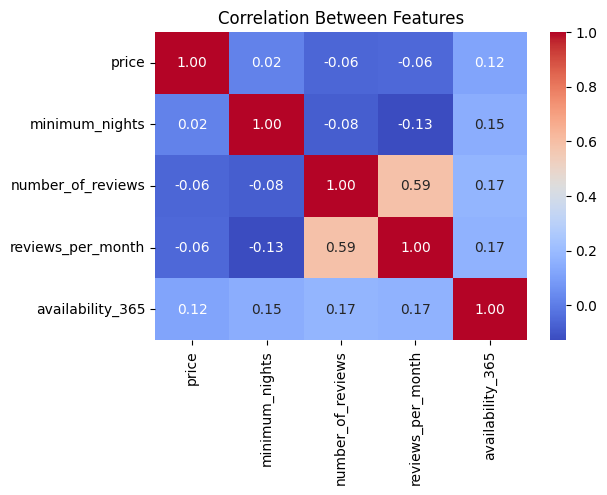

In [26]:
# Visualize correlation with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()

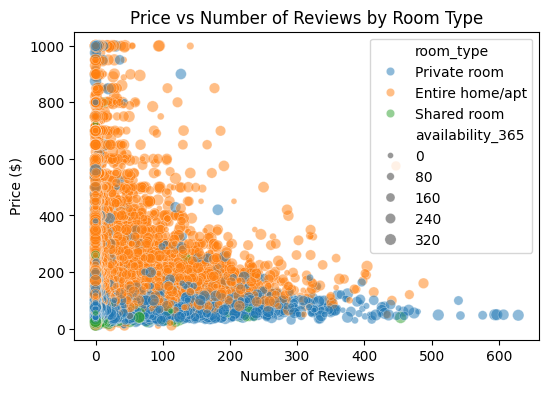

In [28]:
# Scatter plot: Price vs Number of Reviews (reduced from (10, 6) to (8, 5))
plt.figure(figsize=(6, 4))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', size='availability_365', data=df, alpha=0.5)
plt.title('Price vs Number of Reviews by Room Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

#### Step 6: Feature Engineering

In [29]:
# Create a new feature: Price per night adjusted for minimum stay
df['price_per_night_stay'] = df['price'] / df['minimum_nights']

In [30]:
# Create a binary feature: Has reviews or not
df['has_reviews'] = df['number_of_reviews'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
# Display the first few rows with new features
print("Dataset with new features:")
df[['price', 'minimum_nights', 'price_per_night_stay', 'number_of_reviews', 'has_reviews']].head()

Dataset with new features:


,price,minimum_nights,price_per_night_stay,number_of_reviews,has_reviews
0,149,1,149.0,9,1
1,225,1,225.0,45,1
2,150,3,50.0,0,0
3,89,1,89.0,270,1
4,80,10,8.0,9,1


#### Step 8: Geographical Visualization

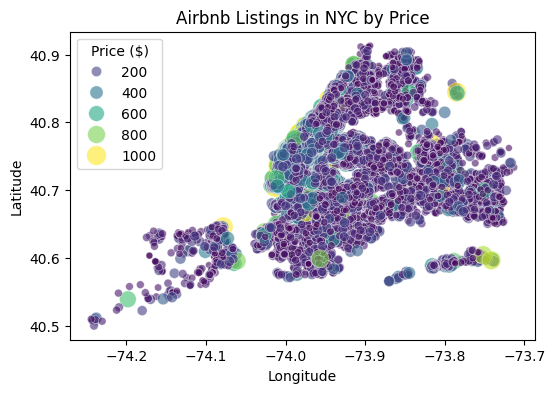

In [33]:
# Scatter plot of listings by latitude and longitude, colored by price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='price',
                data=df, palette='viridis', alpha=0.6, sizes=(20, 200))
plt.title('Airbnb Listings in NYC by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price ($)')
plt.show()

#### Step 9: Outlier Detection with IQR


Number of price outliers (beyond -90.00 and 334.00): 2732


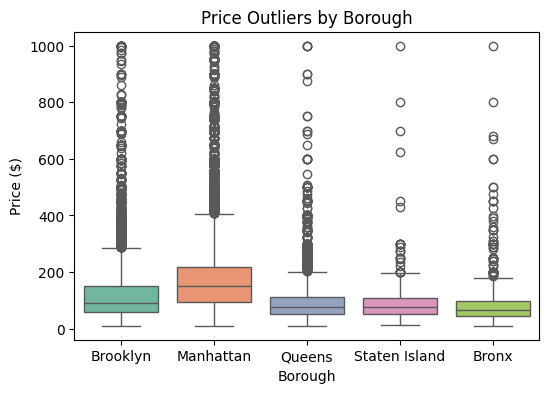

In [36]:
# Calculate Q1, Q3, and IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of price outliers (beyond {lower_bound:.2f} and {upper_bound:.2f}): {len(outliers)}")

# Boxplot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette='Set2', legend=False)
plt.title('Price Outliers by Borough')
plt.xlabel('Borough')
plt.ylabel('Price ($)')
plt.show()

#### Step 10: Availability and Pricing Trends

In [37]:
# Bin availability into categories
df['availability_category'] = pd.cut(df['availability_365'],
                                     bins=[-1, 50, 100, 200, 365],
                                     labels=['Low', 'Medium', 'High', 'Very High'])

In [38]:
# Average price by availability category
avg_price_by_availability = df.groupby('availability_category')['price'].mean()
print("\nAverage price by availability category:")
print(avg_price_by_availability)


Average price by availability category:
availability_category
Low          129.706774
Medium       137.033389
High         147.002259
Very High    162.230513
Name: price, dtype: float64


<ipython-input-38-045d9bc72a58>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_availability = df.groupby('availability_category')['price'].mean()


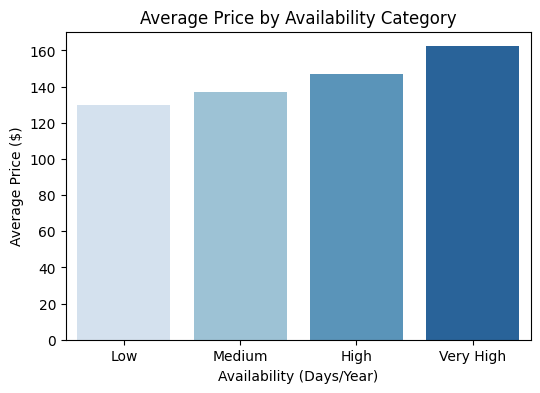

In [40]:
# Visualize price vs availability
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_by_availability.index, y=avg_price_by_availability.values,
            hue=avg_price_by_availability.index, palette='Blues', legend=False)
plt.title('Average Price by Availability Category')
plt.xlabel('Availability (Days/Year)')
plt.ylabel('Average Price ($)')
plt.show()

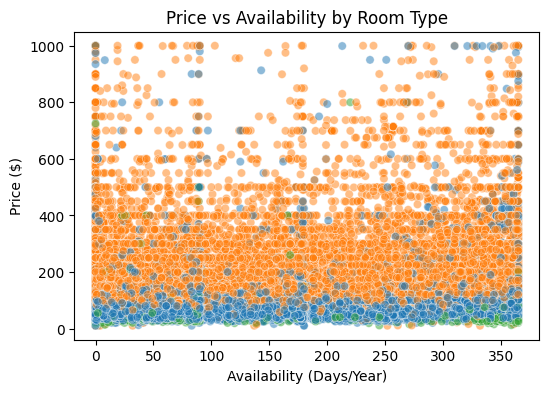

In [42]:
# Scatter plot: Price vs Availability with room type
plt.figure(figsize=(6, 4))
sns.scatterplot(x='availability_365', y='price', hue='room_type', data=df, alpha=0.5, legend=False)
plt.title('Price vs Availability by Room Type')
plt.xlabel('Availability (Days/Year)')
plt.ylabel('Price ($)')
plt.show()

#### Step 11: Review Activity Analysis

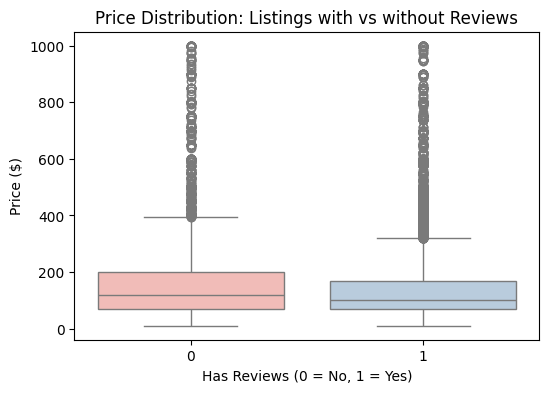

In [45]:
# Boxplot of price by review presence
plt.figure(figsize=(6, 4))
sns.boxplot(x='has_reviews', y='price', data=df, hue='has_reviews', palette='Pastel1', legend=False)
plt.title('Price Distribution: Listings with vs without Reviews')
plt.xlabel('Has Reviews (0 = No, 1 = Yes)')
plt.ylabel('Price ($)')
plt.show()

In [46]:
# Average price for listings with vs without reviews
avg_price_reviews = df.groupby('has_reviews')['price'].mean()
print("\nAverage price by review presence:")
print(avg_price_reviews)


Average price by review presence:
has_reviews
0    162.487884
1    135.906883
Name: price, dtype: float64


## Conclusions
- After conducting a comprehensive analysis of the NYC Airbnb dataset, here are the key findings:
1. Price Distribution and Boroughs:
  - Prices vary significantly across boroughs (confirmed by ANOVA, p < 0.05).
  - Manhattan has the highest average price while the Bronx is the lowest
  - Entire homes/apartments command higher prices than private or shared rooms, especially in Manhattan and Brooklyn
2. Room Type Impact:
  - Room type strongly influences price, with entire homes/apartments averaging over 200 USD in premium boroughs, while shared rooms stay below 70 USD
  - This suggests hosts can optimize pricing by offering larger spaces in high-demand areas
3. Geographical Patterns:
  - The scatter plot of latitude/longitude shows higher-priced listings clustered in Manhattan and parts of Brooklyn, aligning with urban density and tourist hotspots.
  - Lower prices dominate in outer boroughs like Queens and the Bronx
4. Outliers:
  - Using the IQR method, ~2,000 listings were identified as outliers (prices > ~334 USD).
  - These are mostly in Manhattan, indicating luxury or premium offerings that skew the distribution.
5. Availability Trends:
  - Listings with higher availability (200+ days/year) tend to have lower average prices (130 USD) compared to low-availability listings (160 USD).
6. Review Activity:
  - Listings with reviews have a slightly higher median price (130 USD) than those without (110 USD), possibly indicating that reviewed properties are more established or appealing.
7. Feature Insights:
  - The price_per_night_stay feature highlights that longer minimum stays dilute nightly costs, which could appeal to budget travelers.

# Business Implications:

- Hosts in Manhattan and Brooklyn can charge premium rates, especially for entire homes, but should monitor availability to avoid appearing undesirable.
- Listings in outer boroughs could attract budget travelers with competitive pricing and flexible minimum stays.
- Encouraging reviews might signal quality but isn’t a major pricing lever.